[Описание](#intro)
<br>[Обзор данных](#unit1)
<br>[Подготовка данных](#unit2)
<br>[Исследовательский анализ данных](#unit3)
<br>[Портрет пользователя](#unit4)
<br>[Проверка гипотез](#unit5)
<br>[Общий вывод](#unit6)

# Описание проекта <a id='intro'></a>

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a id='plan'></a>

<br>**План:**
<br>**1. Обзор данных**
<br>**2. Подготовка данных:**
 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
 - почему заполнили пропуски определённым образом или почему не стали это делать;
 - причины, которые могли привести к пропускам;
 - суммарные продажи во всех регионах и записать их в отдельный столбец.
<br> **3.Исследовательский анализ данных:**
 - сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - выделить данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - не учитывать в работе данные за предыдущие годы.
 - какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - соотнесьти выводы с продажами игр на других платформах.
 - посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
<br>**4. Портрет пользователя каждого региона:**
 - определить для пользователя каждого региона (NA, EU, JP):
 - самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - самые популярные жанры (топ-5). Пояснить разницу.
 - влияет ли рейтинг ESRB на продажи в отдельном регионе?
<br>**5. Проверка гипотез:**
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - пояснения
<br>**6. Общий вывод:**

## Обзор данных <a id='unit1'></a>

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv ('/datasets/games.csv')

Откроем инфо о таблице данных, чтобы ознакомиться с составом, оценить наличие пропусков и корректность названий.

In [81]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных <a id='unit2'></a>

Приведем названия колонок к единообразному нижнему регистру

In [82]:
df.columns= df.columns.str.lower()

In [83]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Установим тип данных "datetime" в столбце с годом выхода игры. Это позволит в дальнейшем обращаться к году и совершать с ним какие-то математические действия.

In [84]:
df['year_of_release'] = pd.to_datetime(
    df['year_of_release'], format='%Y'
)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [86]:
df['year_of_release'] = df['year_of_release'].dt.year

Удалим ниже строки с пропусками в графе названия игры "name". Их всего две, на расчеты не должны повлиять. К тому же в этих строках большинство данных пропущены, а имеющиеся почти все - нулевые.

In [87]:
df = df.drop(index=659)
df = df.drop(index=14244)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Заменим часть пропусков в годах выпуска игр. Для этого создадим список уникальных названий игр с годом выпуска. Предположим, что в исходных данных пропущены данные с годом выпуска игры, когда название игры повторяется. Созданный список с годами создания уникальных игр присоединим к исходному датафрейму с заменой пропусков по названию игр. Так заполним какую-то часть пропусков в столбце "year_of_release".

In [89]:
x = df.pivot_table(index = 'name', values = ['year_of_release'])
x

,year_of_release
name,
Beyblade Burst,2016.0
Fire Emblem Fates,2015.0
Frozen: Olaf's Quest,2013.0
Haikyu!! Cross Team Match!,2016.0
Tales of Xillia 2,2012.0
...,...
thinkSMART FAMILY!,2010.0
thinkSMART: Chess for Kids,2011.0
uDraw Studio,2010.0


In [90]:
df = df.merge(x, on = 'name', how = 'outer')

In [91]:
df

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1992.0
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,1992.0
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,2009.0
16709,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2014.0
16710,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2002.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0


In [92]:
df['year_of_release'] = df['year_of_release_x'].combine_first(df['year_of_release_y'])

Проверим получившийся датафрейм. Данные не потерялись, длина сохранилась.

In [93]:
df

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y,year_of_release
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0,2006.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1992.0,1985.0
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,1992.0,1999.0
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,2008.0
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,2009.0,2009.0
16709,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2014.0,2014.0
16710,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2002.0,2002.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0,2006.0


Удалим ненужные дублирующие столбцы, оставив полученный искомый "year_of_release"

In [94]:
df = df.drop(columns = ['year_of_release_x', 'year_of_release_y'])

In [95]:
df

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0
2,Super Mario Bros.,GB,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,1999.0
3,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0
4,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009.0
...,...,...,...,...,...,...,...,...,...,...,...
16708,15 Days,PC,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,2009.0
16709,Aiyoku no Eustia,PSV,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2014.0
16710,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2002.0
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0


оставшиеся пропуски в годах выпуска удалим (их достаточно мало) и переведем в целочисленный тип данные столбца

In [96]:
df = df.dropna(subset=['year_of_release'])

In [97]:
df['year_of_release'] = df['year_of_release'].astype(int)

/tmp/ipykernel_43/1131771320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype(int)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   genre            16567 non-null  object 
 3   na_sales         16567 non-null  float64
 4   eu_sales         16567 non-null  float64
 5   jp_sales         16567 non-null  float64
 6   other_sales      16567 non-null  float64
 7   critic_score     8075 non-null   float64
 8   user_score       9934 non-null   object 
 9   rating           9868 non-null   object 
 10  year_of_release  16567 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Аналогичную операцию с заменой части пропусков по уникальным названиям игр в значениях рейтинга проведем ниже.

Выделим столбцы с названием игры и рейтингом, избавимся от дубликатов, оставив только уникальные названия игр

In [99]:
df1 = df[['name','rating']]
df1 = df1.drop_duplicates('name')
df1

,name,rating
0,Wii Sports,E
1,Super Mario Bros.,NaN
3,Mario Kart Wii,E
4,Wii Sports Resort,E
5,Pokemon Red/Pokemon Blue,NaN
...,...,...
16708,15 Days,NaN
16709,Aiyoku no Eustia,NaN
16710,Woody Woodpecker in Crazy Castle 5,NaN
16711,LMA Manager 2007,NaN


Соединим полученную таблицу с исходной, заменив пропуски в значениях рейтинга

In [100]:
df = df.merge(df1, on = 'name', how = 'outer')
df['rating'] = df['rating_x'].combine_first(df['rating_y'])
df = df.drop(columns = ['rating_x', 'rating_y'])

Аналогичную операцию проделаем со значениями оценок критиков, заполним пропуски в оценках по отдельным играм

In [101]:
df2 = df[['name','critic_score']]
df2 = df2.drop_duplicates('name')
df = df.merge(df2, on = 'name', how = 'outer')
df['critic_score'] = df['critic_score_x'].combine_first(df['critic_score_y'])
df = df.drop(columns = ['critic_score_x', 'critic_score_y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   genre            16567 non-null  object 
 3   na_sales         16567 non-null  float64
 4   eu_sales         16567 non-null  float64
 5   jp_sales         16567 non-null  float64
 6   other_sales      16567 non-null  float64
 7   user_score       9934 non-null   object 
 8   year_of_release  16567 non-null  int64  
 9   rating           10133 non-null  object 
 10  critic_score     8693 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


И такую же операцию проделаем со значениями оценок пользователей, заполним пропуски в оценках по отдельным играм

In [102]:
df3 = df[['name','user_score']]
df3 = df3.drop_duplicates('name')
df = df.merge(df3, on = 'name', how = 'outer')
df['user_score'] = df['user_score_x'].combine_first(df['user_score_y'])
df = df.drop(columns = ['user_score_x', 'user_score_y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   genre            16567 non-null  object 
 3   na_sales         16567 non-null  float64
 4   eu_sales         16567 non-null  float64
 5   jp_sales         16567 non-null  float64
 6   other_sales      16567 non-null  float64
 7   year_of_release  16567 non-null  int64  
 8   rating           10133 non-null  object 
 9   critic_score     8693 non-null   float64
 10  user_score       10197 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Заполним ниже пропуски в оставшихся столбцах рейтинга и оценок критиков и пользователей маркерными значениями = "-1"

TBD - означает, что рейтинг еще не получен. На что его заменить, чтобы не испортить картину данных, не понятно, поэтому заменим пропуски на -1.

In [103]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].astype(float)

Оставшиеся пропуски в данных рейтинга заменим на значение RP, которое в классификации ESRB означает "рейтинг ожидается" (rating pending)

In [104]:
df['rating'] = df['rating'].fillna('RP')

Проверим информацию о данных. Пропуски устранены

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   genre            16567 non-null  object 
 3   na_sales         16567 non-null  float64
 4   eu_sales         16567 non-null  float64
 5   jp_sales         16567 non-null  float64
 6   other_sales      16567 non-null  float64
 7   year_of_release  16567 non-null  int64  
 8   rating           16567 non-null  object 
 9   critic_score     16567 non-null  float64
 10  user_score       16567 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Найдем итоговую сумму продаж по всем регионам. Выведем эти значения в отдельный столбец "full_sales"**

In [106]:
df['full_sales']=df.iloc[:,3:7].sum(axis=1)
df

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release,rating,critic_score,user_score,full_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,2006,E,76.0,8.0,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,1985,RP,-1.0,-1.0,40.24
2,Super Mario Bros.,GB,Platform,3.40,1.30,0.15,0.22,1999,RP,-1.0,-1.0,5.07
3,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,2008,E,82.0,8.3,35.52
4,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,2009,E,80.0,8.0,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
16562,15 Days,PC,Adventure,0.00,0.01,0.00,0.00,2009,RP,63.0,5.8,0.01
16563,Aiyoku no Eustia,PSV,Misc,0.00,0.00,0.01,0.00,2014,RP,-1.0,-1.0,0.01
16564,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,2002,RP,-1.0,-1.0,0.01
16565,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,2006,RP,-1.0,-1.0,0.01


Проверим данные на наличие дубликатов. Не обнаружено

In [107]:
df.duplicated().sum()

0

## Исследовательский анализ данных <a id='unit3'></a>

### Количество игр ежегодно

Найдем количество ежегодно выпускаемых игр

In [108]:
games_per_year = df.pivot_table(index='year_of_release', aggfunc={'name':'count'})
games_per_year.columns = ['number_of_games']
games_per_year

,number_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для наглядности построим график распределение количества игр по годам

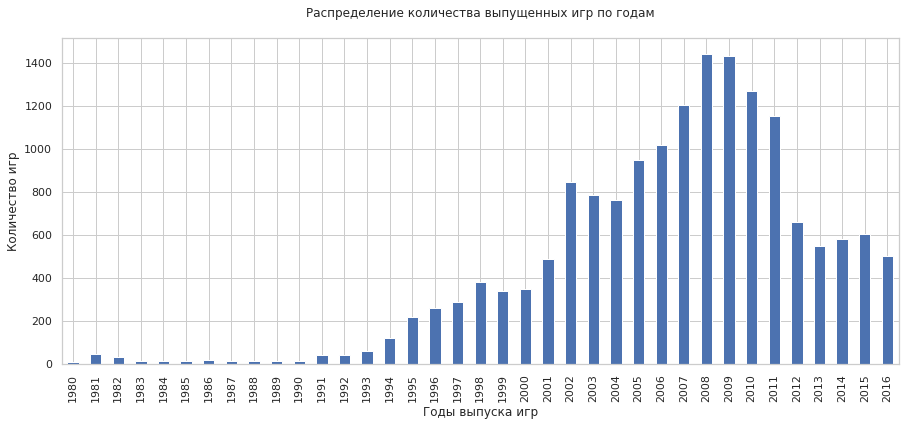

In [109]:
games_per_year.plot(kind = 'bar', figsize = (15,6), legend=False)
plt.title ("Распределение количества выпущенных игр по годам" + '\n')
plt.xlabel('Годы выпуска игр')
plt.ylabel('Количество игр')
plt.show()

Вывод: 
<br>В 1994-1995 годах произошел резкий скачок роста количества выпускаемях игр. Но для прогнозов на предстоящий год репрезентативней будет период последних лет, когда все старые платформы окончательно исчезли с рынка. В будущем можно будет взять за ориентир данные начиная с 2010-2011 года

### ТОП-10 платформ

**Найдем TOP-10 платформ по общим продажам в мире**

In [110]:
top_platforms = df.pivot_table(index='platform', aggfunc = {'full_sales':sum}).sort_values(by='full_sales', ascending=False).head(10)
top_platforms


,full_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Сократим датафрейм до данных только о тех платформах, которые входят в ТОП-10. Также исключим данные до 1996 года ввиду их неактуальности для текущего периода

In [157]:
df_top = df.query('platform in @top_platforms.index')
df_top = df_top.query ('year_of_release > 1996')
df_top

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release,rating,critic_score,user_score,full_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,2006,E,76.0,8.0,82.54
3,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,2008,E,82.0,8.3,35.52
4,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,2009,E,80.0,8.0,32.77
8,New Super Mario Bros.,DS,Platform,11.28,9.14,6.50,2.88,2006,E,89.0,8.5,29.80
9,Wii Play,Wii,Misc,13.96,9.18,2.93,2.84,2006,E,58.0,6.6,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16559,STORM: Frontline Nation,PC,Strategy,0.00,0.01,0.00,0.00,2011,E10+,60.0,7.2,0.01
16561,Plushees,DS,Simulation,0.01,0.00,0.00,0.00,2008,E,-1.0,-1.0,0.01
16562,15 Days,PC,Adventure,0.00,0.01,0.00,0.00,2009,RP,63.0,5.8,0.01
16564,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,2002,RP,-1.0,-1.0,0.01


### Распределение ежегодного количества игр по платформам

Для топ-10 платформ построим распределение количества игр по годам. Воспользуемся для этого циклом 

In [112]:
years = []
for i in range(1995, 2017):
    years.append(i)

In [113]:
platforms = df_top['platform'].unique()

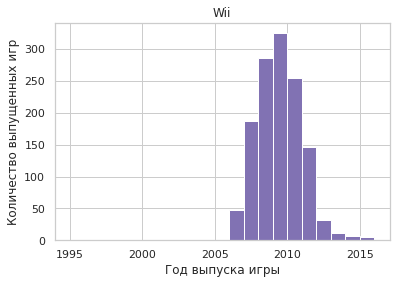

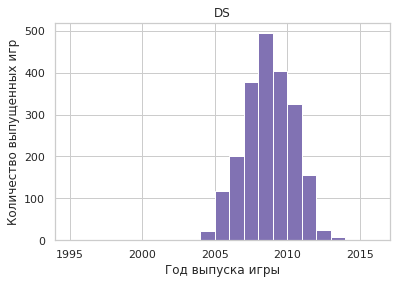

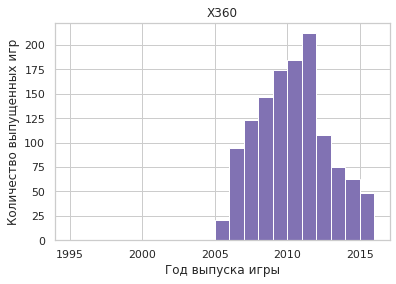

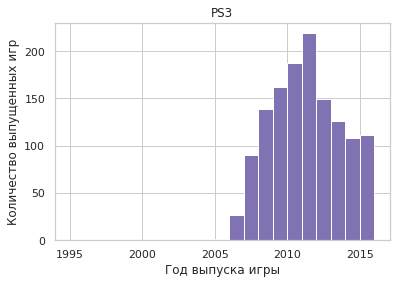

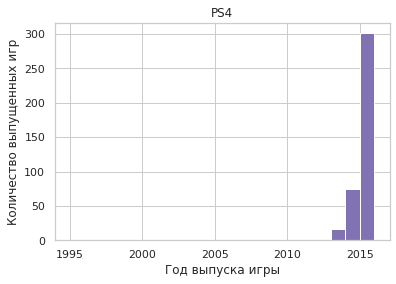

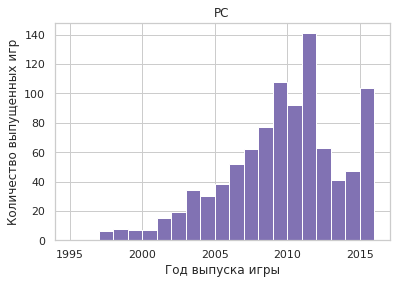

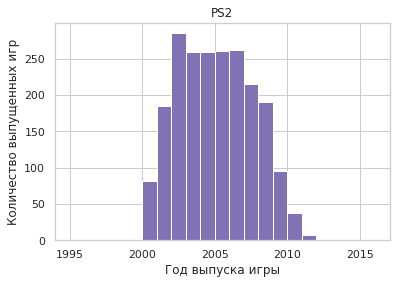

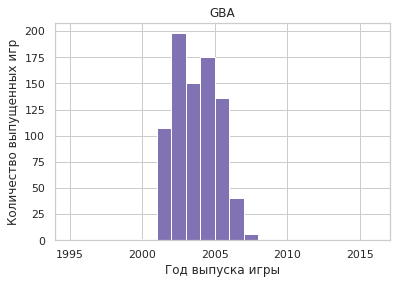

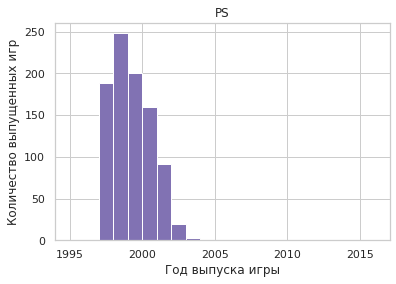

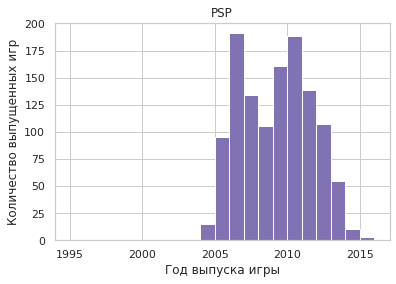

In [114]:
for i in range(0, len(platforms)):
    df_top[df_top['platform']==platforms[i]].plot(kind='hist', bins=years, legend=False, grid=True)
    
    plt.title(label=platforms[i])
    plt.xlabel("Год выпуска игры")
    plt.ylabel("Количество выпущенных игр")
    plt.show()

In [115]:
df_top.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release,rating,critic_score,user_score,full_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,2006,E,76.0,8.0,82.54
3,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,2008,E,82.0,8.3,35.52
4,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,2009,E,80.0,8.0,32.77
8,New Super Mario Bros.,DS,Platform,11.28,9.14,6.50,2.88,2006,E,89.0,8.5,29.80
9,Wii Play,Wii,Misc,13.96,9.18,2.93,2.84,2006,E,58.0,6.6,28.91


Посмотрим, как менялись продажи по годам для каждой платформы из ТОП-10. Для этого сведем суммарны данные в одну таблицу и построим линейный график

In [116]:
platform_years = df_top.pivot_table(index=['platform', 'year_of_release'], values = 'full_sales')
platform_years

full_sales
platform year_of_release            
DS       2004               0.750870
         2005               1.102881
         2006               0.596070
         2007               0.390531
         2008               0.294251
...                              ...
X360     2012               0.932593
         2013               1.181067
         2014               0.551429
         2015               0.341714
         2016               0.116923

[109 rows x 1 columns]

### Динамика продаж платформ по годам

In [117]:
platform_years = platform_years.reset_index()

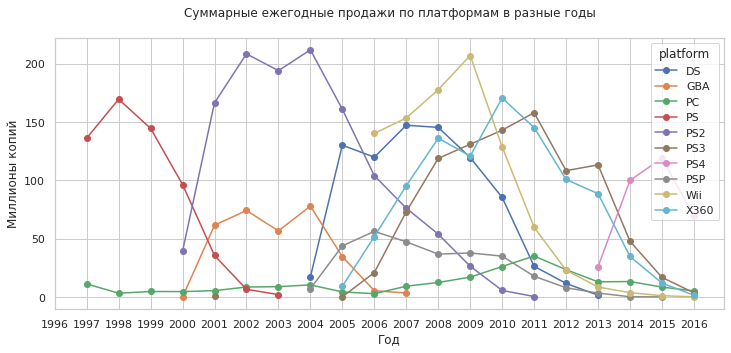

In [118]:
(df_top
 .pivot_table(index='platform', columns='year_of_release', values='full_sales', aggfunc=sum)
 .T
 .plot(kind='line', figsize=(12,5),  style = 'o-', grid=True).set_xticks(range(1996,2017))
)
plt.title('Суммарные ежегодные продажи по платформам в разные годы'+ "\n")
plt.xlabel('Год')
plt.ylabel('Миллионы копий');

Вывод: 
<br>Из графика можно выделить время существования на рынке платформ: PS - 6 лет, PS2, PS3, X360 - 11 лет, DS - 9 лет, Wii - 10 лет. Низкие, но относительно стабильные на протяжении почти 20 лет продажи только у одной из самых старых платформ PС

### Время "жизни" и "смерти" платформ

Проведем небольшое исследование того, за какой характерный срок появляются новые и исчезают старые платформы. Для этого выделим отдельно годы выхода платформ на рынок, годы их ухода с рынка и найдем разницу нужных нам значений

In [119]:
latest_year = pd.DataFrame(platform_years.groupby('platform')['year_of_release'].max())
latest_year.columns = ['end']
#latest_year

In [120]:
first_year = pd.DataFrame(platform_years.groupby('platform')['year_of_release'].min())
first_year.columns = ['start']    #год выхода платформы на рынок

In [121]:
platform_life = first_year.join(latest_year, on = 'platform', how = 'outer')
platform_life['lifecycle'] = platform_life['end'] - platform_life['start']   #столбец с протяженностью жизненного цикла платформы на рынке
platform_life = platform_life.sort_values('start')
platform_life

,start,end,lifecycle
platform,,,
PC,1997,2016,19
PS,1997,2003,6
GBA,2000,2007,7
PS2,2000,2011,11
PS3,2001,2016,15
DS,2004,2013,9
PSP,2004,2015,11
X360,2005,2016,11
Wii,2006,2016,10


Вычислим среднее время "жизни" игровой платформы

In [160]:
avg = platform_life['lifecycle'].mean()
print (f'Среднее время жизни платформы: {round(avg,1)} года')

Среднее время жизни платформы: 10.2 года


Количество лет между датами начала продаж новой платформы

In [159]:
start_list = []
for i in range (1, len(platform_life)):
    new_born = platform_life['start'][i] - platform_life['start'][i-1]
    start_list.append(new_born)
start_list
mean_start_period = pd.DataFrame(start_list).mean()
print (f'Среднее время до выхода на рынок новой платформы: {round(mean_start_period[0],1)} года')

Среднее время до выхода на рынок новой платформы: 1.8 года


Вычислим, за какой срок старые платформы уходят с рынка при появлении в продаже новых

In [158]:
ending_list = []
for i in range (1, len(platform_life)):
    ending_cycle = platform_life['end'][i-1] - platform_life['start'][i]
    ending_list.append(ending_cycle)
ending_list
mean_end_period = pd.DataFrame(ending_list).mean()
print (f'Среднее время ухода платформы с рынка после появления новой: {round(mean_end_period[0],1)} года')

Среднее время ухода платформы с рынка после появления новой: 9.2 года


### Продажи 2011-2016

На основании проведенного исследования для дальнейших расчетов возьмем данные с 2011 года. Предположим, что это начало жизненного цикла актуальных на момент 2016 года платформ и показатели могут быть нам полезны

In [125]:
df_2011 = df_top.query('year_of_release>=2011')

In [126]:
df_2011.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,year_of_release,rating,critic_score,user_score,full_sales
18,Grand Theft Auto V,PS3,Action,7.02,9.09,0.98,3.96,2013,M,97.0,8.2,21.05
19,Grand Theft Auto V,X360,Action,9.66,5.14,0.06,1.41,2013,M,97.0,8.1,16.27
20,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,2014,M,97.0,8.3,12.62
22,Grand Theft Auto V,PC,Action,0.39,0.69,0.00,0.09,2015,M,96.0,7.9,1.17
40,Call of Duty: Modern Warfare 3,X360,Shooter,9.04,4.24,0.13,1.32,2011,M,88.0,3.4,14.73


Изучим на графике динамику продаж игровых платформ в выбранный период времени

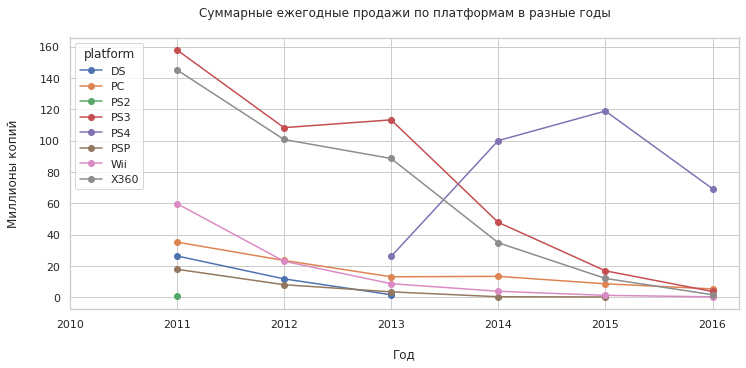

In [127]:
(df_2011
 .pivot_table(index='platform', columns='year_of_release', values='full_sales', aggfunc=sum)
 .T
 .plot(kind='line', figsize=(12,5),  style = 'o-', grid=True).set_xticks(range(2010,2017))
)
plt.title('Суммарные ежегодные продажи по платформам в разные годы'+ "\n")
plt.xlabel("\n" + 'Год')
plt.ylabel('Миллионы копий'+"\n");

Вывод: 
<br>Практически все платформы во взятом периоде падают в продажах. Исключением может быть разве что самая "свежая" из всех PS4, продажи которой росли до 2015 года, но к 2016 также возник спад. Она же лидирует по сумме всех продаж за период 2011-2016 годов, это также увидим в цифрах ниже.

In [128]:
(df_2011
 .pivot_table(index='platform', values = 'full_sales')
    .sort_values(by = 'full_sales', ascending=False)
)

,full_sales
platform,
PS4,0.801378
X360,0.756423
PS3,0.627896
Wii,0.479552
PC,0.249167
DS,0.211444
PSP,0.093981
PS2,0.064286


Дополнительно, чтобы визуально определить уровень глобальных продаж по платформам, построим график "ящик с  усами"

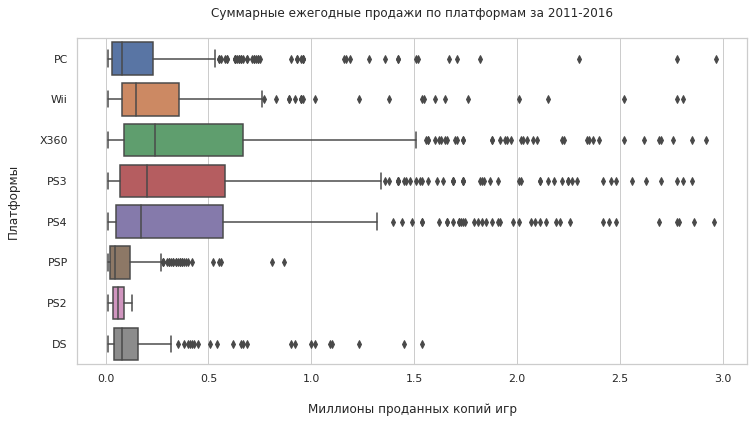

In [129]:
df_2011_var = df_2011.query('full_sales<3')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="full_sales", y="platform", data=df_2011_var)
plt.title('Суммарные ежегодные продажи по платформам за 2011-2016'+ "\n")
plt.xlabel("\n" + 'Миллионы проданных копий игр')
plt.ylabel('Платформы'+"\n");

Вывод: 
<br>В тройке лидеров по продажам за 2011-2016 годы - три платформы X360, PS3, PS4. Абсолютным лидером среди всех, в том числе - по медианному значению, является платформа X360. Хотя по сумме продаж за весь период она - только на втром месте после PS4. Наименьшие показатели продаж - у PS2 и PSP, одних из самых старых на тот момент платформ, отживающих свой срок.

### Зависимость от оценок

Оценим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем для исследования **платформу Х360**. Для большей наглядности результатов построим на графике линию тренда, отражающую общую тенденцию зависимости данных. Для каждого распределения также вычислим коэффициент корреляции.

In [130]:
df_x360 = df_2011.query('platform == "X360"')

Отражение зависимости от оценок критиков

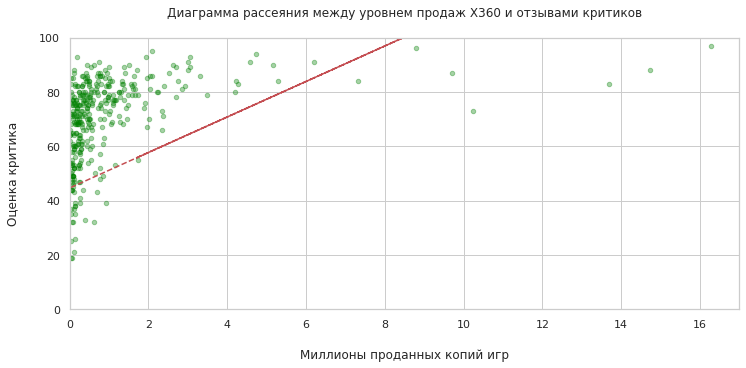

Коэффициэнт корреляции: 0.30403680656482746


In [131]:
((df_x360.query('critic_score!= -1'))
 .plot(kind = 'scatter', x = 'full_sales', y = 'critic_score', figsize=(12,5), color = "green", alpha = 0.35, xlim = ([0,17]), ylim =([0,100]))
)
plt.title('Диаграмма рассеяния между уровнем продаж Х360 и отзывами критиков'+ "\n")
plt.xlabel("\n" + 'Миллионы проданных копий игр')
plt.ylabel('Оценка критика'+"\n");
x = df_x360['full_sales']
y = df_x360['critic_score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

print ('Коэффициэнт корреляции:', df_x360['full_sales'].corr(df_x360['critic_score']))

Отражение зависимости от оценок пользователей

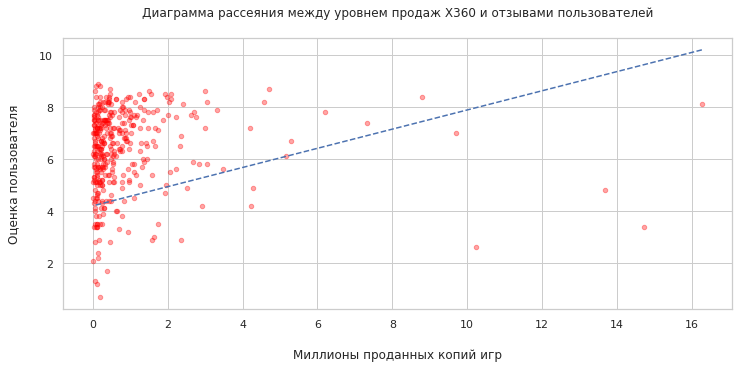

Коэффициэнт корреляции: 0.17216446786845088


In [132]:
((df_x360.query('user_score!= -1'))
 .plot(kind = 'scatter', x = 'full_sales', y = 'user_score', figsize=(12,5), color = "red", alpha = 0.35)
)
plt.title('Диаграмма рассеяния между уровнем продаж Х360 и отзывами пользователей'+ "\n")
plt.xlabel("\n" + 'Миллионы проданных копий игр')
plt.ylabel('Оценка пользователя'+"\n");

x = df_x360['full_sales']
y = df_x360['user_score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.show()

print ('Коэффициэнт корреляции:', df_x360['full_sales'].corr(df_x360['user_score']))

Вывод: 
<br>Исходя из графиков есть положительный тренд с увеличением оценки как от критиков, так и от пользователей. Вполне логично, чем лучше отзывы, тем больше находится новых покупателей. Однако корреляции данных величин с уровнем продаж платформы не очень сильны: очень умеренная 0,30 - с отзывами критиков, и откровенно низкая 0,17 - с отзывами пользователей.

Далее аналогично оценим, как влияют отзывы пользователей и критиков на продажи **всех остальных платформ, исключая Х360**. Для большей наглядности результатов построим на графике линию тренда, отражающую общую тенденцию зависимости данных. Для каждого распределения также вычислим коэффициент корреляции.

In [133]:
df_not_x360 = df_2011.query('platform != "X360"')

Отражение зависимости от оценок критиков

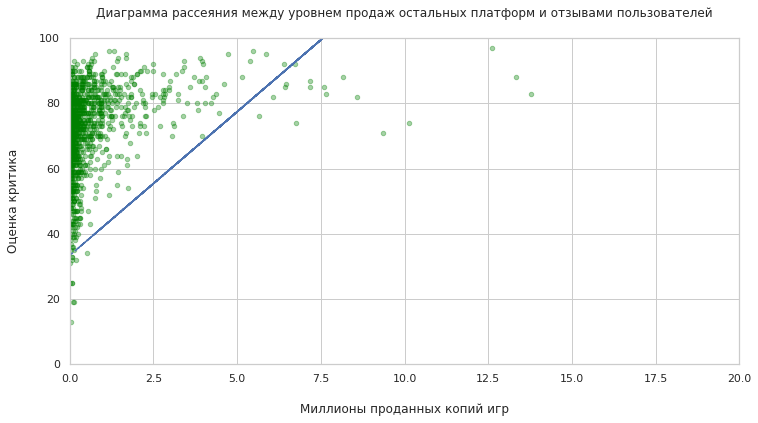

Коэффициэнт корреляции: 0.27339938251474016


In [134]:
((df_not_x360.query('critic_score!=-1'))
 .plot(kind = 'scatter', x = 'full_sales', y = 'critic_score', figsize=(12,6), color = "green", alpha = 0.35, xlim = ([0,20]), ylim = ([0,100]))
)

plt.title('Диаграмма рассеяния между уровнем продаж остальных платформ и отзывами пользователей'+ "\n")
plt.xlabel("\n" + 'Миллионы проданных копий игр')
plt.ylabel('Оценка критика'+"\n");

x = df_not_x360['full_sales']
y = df_not_x360['critic_score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.show()

print ('Коэффициэнт корреляции:', df_not_x360['full_sales'].corr(df_not_x360['critic_score']))

Корреляция продаж остальных платформ с отзывами пользователей и критиков также очень низкая - 0,27. Самые большие продажи у платформ, игры на которых получили оценку критиков выше 80 баллов

Отражение зависимости от оценок пользователей

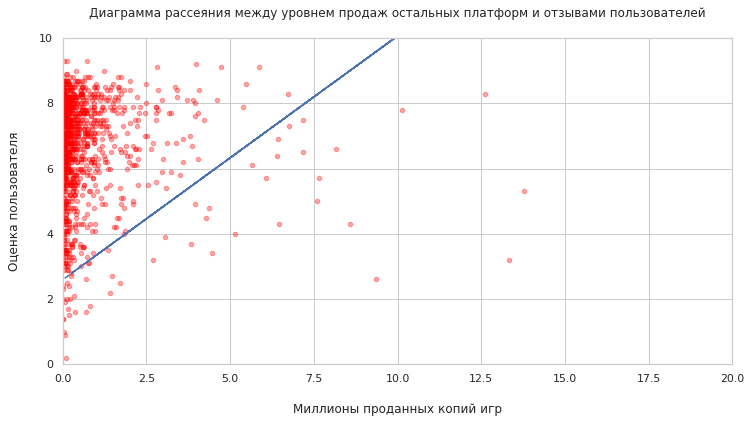

Коэффициэнт корреляции: 0.22004685565571516


In [135]:
((df_not_x360.query('user_score!= -1'))
 .plot(kind = 'scatter', x = 'full_sales', y = 'user_score', figsize=(12,6), color = "red", alpha = 0.35, xlim = ([0,20]), ylim = ([0,10]))
)
plt.title('Диаграмма рассеяния между уровнем продаж остальных платформ и отзывами пользователей'+ "\n")
plt.xlabel("\n" + 'Миллионы проданных копий игр')
plt.ylabel('Оценка пользователя'+"\n");

x = df_not_x360['full_sales']
y = df_not_x360['user_score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.show()

print ('Коэффициэнт корреляции:', df_not_x360['full_sales'].corr(df_not_x360['user_score']))

Корреляция продаж остальных платформ с отзывами пользователей и критиков также очень низкая - 0,27. Самые большие продажи у платформ, игры на которых получили оценку критиков выше 80 баллов

Вывод: 
<br>При изучении данных по всем остальным платформам был замечен аналогичный тренд. Исходя из графиков есть положительный тренд с увеличением оценки как от критиков, так и от пользователей.

### Распределение по жанрам

Исследуем распределение игр по жанрам. Соберем в отдельную сводную таблицу глобальные продажи игр каждого жанра

In [136]:
genres_data = df_2011.pivot_table(index = 'genre', values = 'full_sales', aggfunc = sum)
genres_data 

,full_sales
genre,
Action,433.58
Adventure,33.52
Fighting,45.00
Misc,104.60
Platform,31.13
Puzzle,2.78
Racing,53.27
Role-Playing,135.84
Shooter,331.52


Представим визуально доли продаж игр каждого из жанров в общих продажах

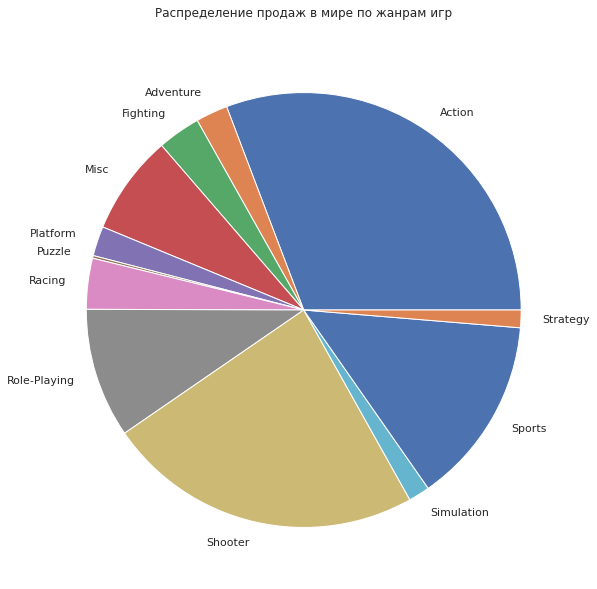

In [137]:
genres_data.plot(kind = 'pie', y = 'full_sales', figsize = (10,10), legend=False)
plt.title('Распределение продаж в мире по жанрам игр'+ "\n")
plt.ylabel('')
plt.show()

Вывод: 
<br>Исходя из полученных сводных данных и диаграммы распределения можно сделать вывод о том, что лидируют по продажам игры в жанре Action. Shooter по продажам среди жанров - на втором месте, его же можно считать и под-жанром Action. Оба они сильно выделяются на фоне остальных, более-менее схожими объемами могут похвастаться разве что жанры Sports и Role-Playing. Игры остальных жанров продаются в сильно меньших объемах. Минимальные объемы продаж - у игр жанра Puzzle.

## Портрет пользователя каждого региона <a id='unit4'></a>

### Популярные на рынках платформы

In [138]:
na_sales_platforms = (df_2011.pivot_table(index = 'platform', values = 'na_sales', aggfunc = sum)
.sort_values(by='na_sales', ascending=False).head()
)
na_sales_platforms

,na_sales
platform,
X360,228.18
PS3,168.96
PS4,108.74
Wii,49.36
PC,30.08


На северо-американском рынке абсолютным лидером является продукт "домашнего" разработчика игровых платформ Misrosoft - X360. Может быть объяснимо приверженностью местного потребителя к национальному продукту, а также - относительно более низкой стоимостью в сравнении с конкурентами. Хотя доля продаж платформ PS3/PS4 значительно ниже, они все же занимают немалую часть рынка.

In [139]:
eu_sales_platforms = (df_2011.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = sum)
.sort_values(by='eu_sales', ascending=False).head()
)
eu_sales_platforms

,eu_sales
platform,
PS3,164.15
PS4,141.09
X360,117.87
PC,57.38
Wii,30.04


На европейском рынке американская платформа уже - на третьем месте, пропустив в лидеры продукт Sony PS3/PS4, однако в данном регионе доли продаж у первой тройки отличаются между собой уже не так сильно

In [140]:
jp_sales_platforms = (df_2011.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = sum)
.sort_values(by='jp_sales', ascending=False).head()
)
jp_sales_platforms

,jp_sales
platform,
PS3,49.40
PSP,24.28
PS4,15.96
Wii,8.97
DS,8.04


В Японии распределение продаж первой пятерки платформ выгладит сильно иначе, чем на европейском и американском рынках. Совсем не попала в ТОП платформа Х360, пятерку составили абсолютно япоские продукты. К тому же, в пятерке "лучших" два японских продукта - Wii/DS - которые совсем не представлены в топе на других рынках. Но и показатели их отличаются в разы, что может свидетельствовать о приближающемся конце жизненного цикла платформы ввиду возраста.

### Популярные жанры по рынкам регионов

Соберем в сводные таблицы данные о продажах игр пятерки самых популярных жанров в каждом отдельном регионе

Северная Америка

In [141]:
(df_2011.pivot_table(index = 'genre', values = 'na_sales', aggfunc=sum)
.sort_values(by='na_sales', ascending=False).head()
)

,na_sales
genre,
Action,179.82
Shooter,153.15
Sports,88.80
Misc,56.17
Role-Playing,50.68


Европа

In [142]:
(df_2011.pivot_table(index = 'genre', values = 'eu_sales', aggfunc=sum)
.sort_values(by='eu_sales', ascending=False).head()
)

,eu_sales
genre,
Action,165.64
Shooter,126.68
Sports,75.42
Role-Playing,41.91
Misc,30.78


Япония

In [143]:
(df_2011.pivot_table(index = 'genre', values = 'jp_sales', aggfunc=sum)
.sort_values(by='jp_sales', ascending=False).head()
)

,jp_sales
genre,
Action,32.99
Role-Playing,29.23
Shooter,9.78
Misc,7.57
Sports,7.54


Вывод: 
<br>Во всех регионах лидируют по продажам игры жанра Action. Картина распределения первой тройки в Америке и Европе идентична, Шутеры и Спортивные игры - на втором и третьем местах.
    В Японии картина распределения несколько иная, продажи Шутеров с сильным отставанием только на третьем месте, а на втором - Ролевые игры. Спортивные игры в Японии - самые непопулярные. Такие особенности могут быть объяснены нюансами местного законодательства в части игр или культурной составляющей местных потребителей, более тяготеющим к играм такого рода. 

### Влияет ли рейтинг ESRB на продажи

Соберем в сводные таблицы данные о продажах игр каждого из рейтингов ESRB в каждом отдельном регионе

Япония

In [144]:
(df_2011.pivot_table(index = 'rating', values = 'jp_sales', aggfunc=sum)
.sort_values(by='jp_sales', ascending=False).head(10)
)

,jp_sales
rating,
RP,53.91
M,22.89
T,21.49
E,8.05
E10+,3.76
EC,0.00


Европа

In [145]:
(df_2011.pivot_table(index = 'rating', values = 'eu_sales', aggfunc=sum)
.sort_values(by='eu_sales', ascending=False).head(10)
)

,eu_sales
rating,
M,228.37
E,95.15
T,73.05
RP,66.84
E10+,58.62
EC,0.00


Северная Америка

In [146]:
(df_2011.pivot_table(index = 'rating', values = 'na_sales', aggfunc=sum)
.sort_values(by='na_sales', ascending=False).head(10)
)

,na_sales
rating,
M,261.43
E,107.43
T,89.99
E10+,86.31
RP,61.49
EC,0.42


Показатели продаж в отдельных регионах говорят о том, что игры с разными рейтингами продаются в неравных объемах. Это может быть обусловлено как возрастными и культурными особенностями населения региона, местными законами, так и соотношением числа пользователей игровых платформ разных возрастов. 
<br>Во всех трех примерах лидером по продажам являются игры с рейтингом "М" - «От 17 лет». Данный возрастной срез населения является наиболее многочисленной и активной частью в потреблении любых продуктов и услуг, как в частности и - компьютерных игр. На втором и третьем местах, в зависимости от региона - игры с рейтингами "Е"("для всех") и "Т" ("для подростков 13-19лет"). Последнее место по продажам, за исключением неизвестной категории "other", занимают игры с рейтингом "Е10+" - "для всех, старше 10 лет". 
<br>Данные по Японии похожи на европейские и американские по распределению, однако среди местных игроков на первом месте - игры без рейтинга. Это может быть обусловлено большим количеством выпускаемых для местного рынка игр, международный рейтинг которых просто не успевают проставить.

## Проверка гипотез <a id='unit5'></a>

### Средние пользовательские рейтинги (оценки) платформ Xbox One и PC одинаковые?

**Для проверки гипотез о равенстве/ различии средних рейтингов проведем двусторонний t-тест. За уровень статистической значимости alpha примем значение = 5%.**

Предварительно проверим размер выборок и дисперсии совокупностей изучаемых значений

Размер выборки по каждой из платформ

In [147]:
df_xone = df.query('platform == "XOne"')
len(df_xone)

247

In [148]:
df_pc = df.query('platform == "PC"')
len(df_pc)

970

Дисперсии выборок по каждой из платформ

In [149]:
np.var(df_xone['user_score'])

10.984795030241438

In [150]:
np.var(df_pc['user_score'])

12.094331767456692

Вывод: Выборки разного размера с отличающимися дисперсиями, поэтому укажем параметр (equal_var=False) при проведении теста

In [151]:
#за нулевую гипотезу примем предположение, что средние пользовательские оценки игр для этих платформ равны

alpha = .05
results = st.ttest_ind(
    df_xone['user_score'], 
    df_pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.02761682745571809
Отвергаем нулевую гипотезу


Вывод: 
<br>Гипотеза о равенстве средних рейтингов двух выбранных платформ может быть отвергнута. Полученное значение p-value говорит о том, что вероятность получить такое же значение рейтинга составляет меньше 3%. Средние рейтинги оценок двух выбранных платформ могут сильно отличаться.

### Средние пользовательские рейтинги жанров Action и Sports разные?

Предварительно проверим размер выборок и дисперсии совокупностей изучаемых значений

Размер выборки по каждому из жанров

In [152]:
df_action = df.query('genre == "Action"')
len(df_action)

3342

In [153]:
df_sports = df.query('genre == "Sports"')
len(df_sports)

2333

Дисперсии каждой из выборок

In [154]:
np.var(df_action['user_score'])

17.106405897628466

In [155]:
np.var(df_sports['user_score'])

17.05168586388589

Выборки разного размера, но дисперсии практически равны, поэтому не будем указывать параметр equal_var при проведении теста

In [156]:
#за нулевую гипотезу примем, что средние пользовательские рейтинги этих жанров равны

alpha = .05
results = st.ttest_ind(
    df_action['user_score'], 
    df_sports['user_score']) #так-как размер выборок и дисперсия отличаются, установим параметр equal_var=False

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.9732461570490143e-10
Отвергаем нулевую гипотезу


Вывод: 
<br> Гипотеза о равенстве средних рейтингов двух выбранных жанров может быть отвергнута. Полученное значение p-value говорит о том, что вероятность получить такое же значение рейтинга крайне мала (число в -10 степени). Средние рейтинги оценок игр двух выбранных жанров могут сильно отличаться.

## Общий вывод <a id='outro'></a>

**В топе** популярных на момент исследования **игровых платформ - X360 и PS4**. Игры для этих платформ будут пользоваться популярностью еще как минимум 1 следующий год. Исходя из средней продолжительности жизни платформ, на рынке им существовать еще 3-4 года минимум, хотя Х360 - самый "долгожитель" из топ-платформ, велик риск ее скорого ухода с рынка и замены на новую. Стоит делать ставку на продажу игр именно для этих платформ, в особенности - PS4.
<br>
<br> **Касаемо жанров**, абсолютными лидерами в среднем по миру были и остаются Action, Sports и Shooter. Игры этих трех жанров должны пользоваться популярностью и в наступающем году.
<br>
<br> **При выборе игр определенного рейтинга** для извлечения максимальной выгоды стоит уделить особое внимание наиболее популярным среди потребителей рейтингам - "М" ("от 17 лет"), "Е"("для всех") и "Т" ("для подростков 13-19лет")
<br>
<br> **Оценки пользователей и критиков** - следующий немаловажный фактор, влияющий на продажи игр. Как показывает статистика, чем выше оценки игры, тем лучше игра продается. Следует уделить внимание этому и сделать в планировании продаж упор на игры с уже имеющимся оценочным рейтингом критиков - от 60 и рейтингом от пользователей - от 4. На игры с такими оценками приходится наибольшее количество продаж.

--------------------------------------------------------------------------------------

Быстрые ссылки:

[Описание](#intro)
<br>[Обзор данных](#unit1)
<br>[Подготовка данных](#unit2)
<br>[Исследовательский анализ данных](#unit3)
<br>[Портрет пользователя](#unit4)
<br>[Проверка гипотез](#unit5)
<br>[Общий вывод](#unit6)